I declare this is my own work in accordance with Seneca College’s Academic Policies. No part has
been copied manually or electronically from any other source (including web sites) or distributed
to other students.

Name: Elin Huliiev Student Number: 163890189

In [350]:
import pandas as pd
import numpy as np
import time
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [351]:
names = [0]*30

feats = ["radius","texture","perimeter","area,","smoothness","compactness","concavity","concave_points","symmetry",\
         "fractal_dimension"] # we have 10 features + id and class variable

for i in range(10): # for each feature we have mean, std and mean_worst
    n = feats[i]
    ind1 = i + 10 # each triple is located on the distance of ten, like 0,10,20 for the radius, or 9,19,29 for fractal_dimension
    ind2 = i + 20
    names[i] = n+"_mean"
    names[ind1] = n+"_std"
    names[ind2] = n+"_mean_worst"

names = ["ID","Diagnosis"]+names

In [352]:
df = pd.read_csv("a3.csv", names=names)

In [353]:
df.head() # our data frame

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,"area,_mean",smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_mean_worst,texture_mean_worst,perimeter_mean_worst,"area,_mean_worst",smoothness_mean_worst,compactness_mean_worst,concavity_mean_worst,concave_points_mean_worst,symmetry_mean_worst,fractal_dimension_mean_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [354]:
np.count_nonzero(df.isnull()) # no nulls

0

In [355]:
df.drop(["ID"], inplace = True, axis =1 ) # we do not need an ID of the record since it does not hold any value for us

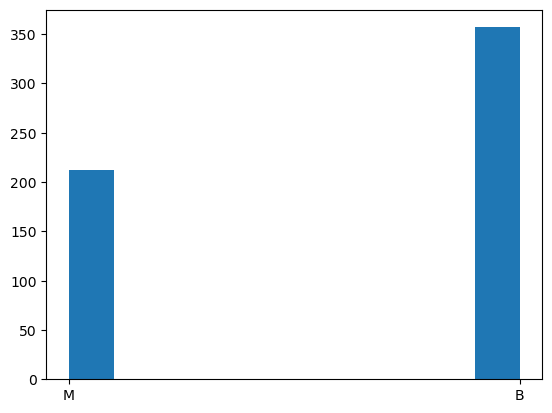

Diagnosis



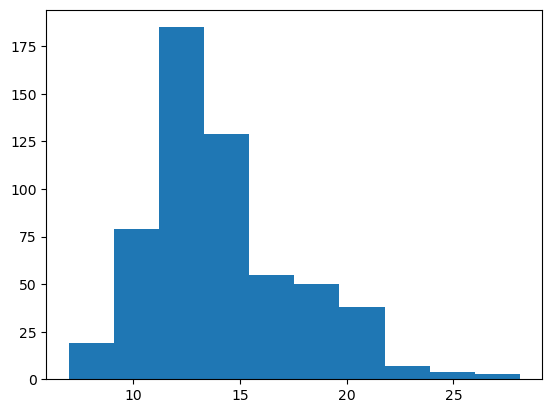

radius_mean



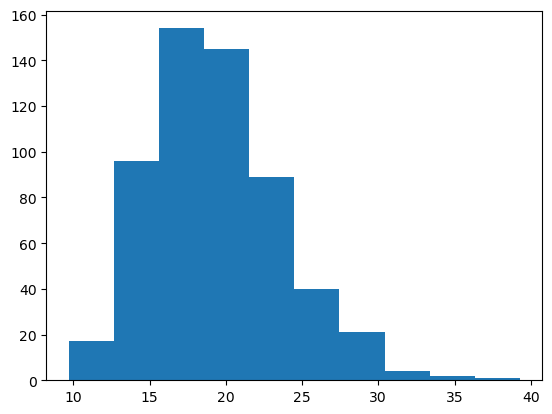

texture_mean



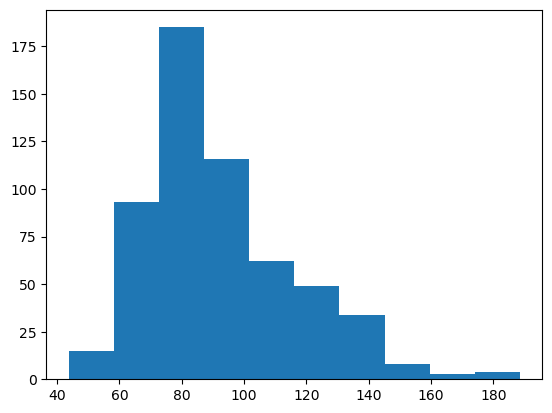

perimeter_mean



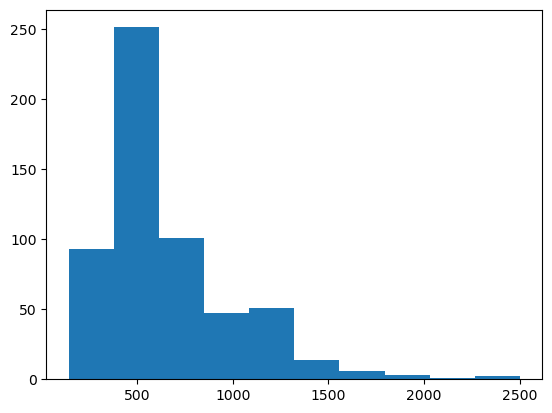

area,_mean



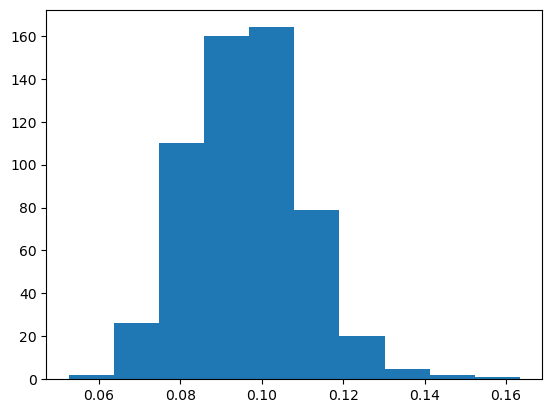

smoothness_mean



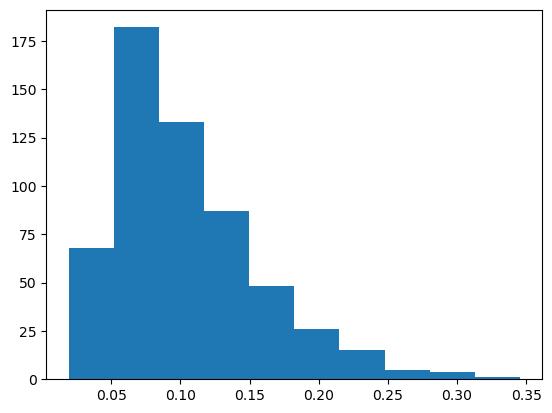

compactness_mean



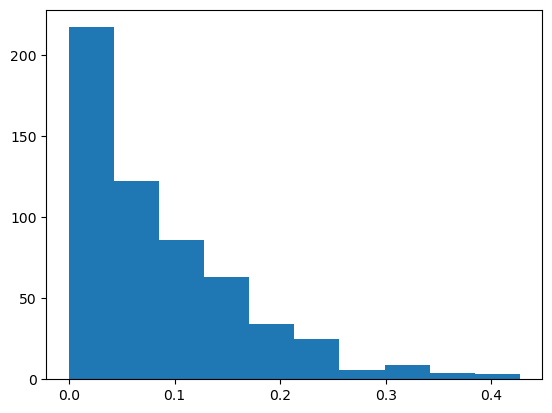

concavity_mean



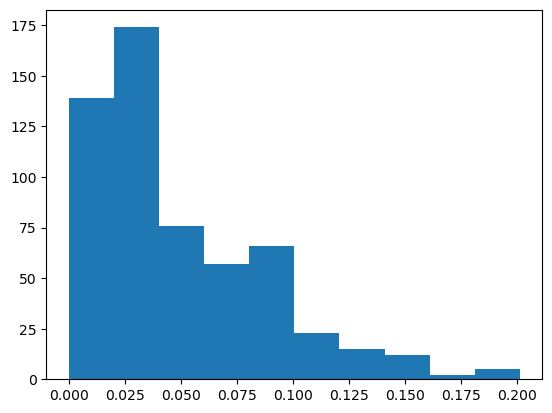

concave_points_mean



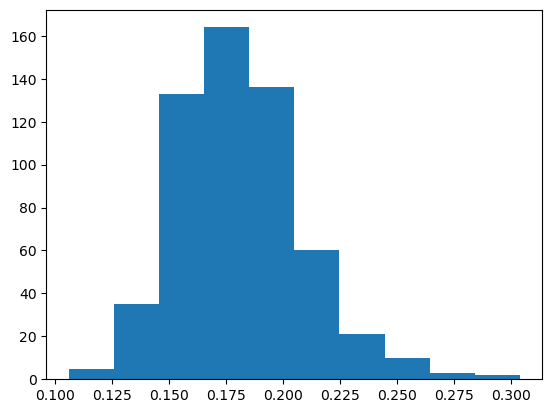

symmetry_mean



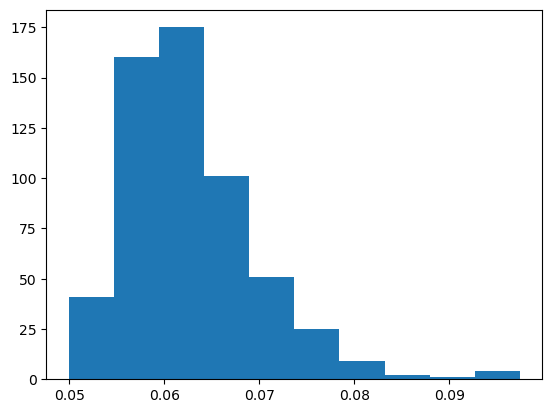

fractal_dimension_mean



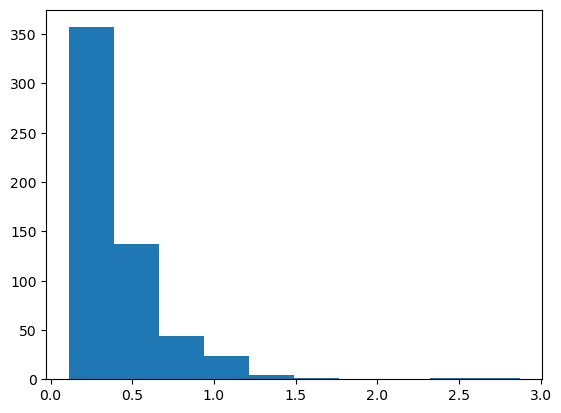

radius_std



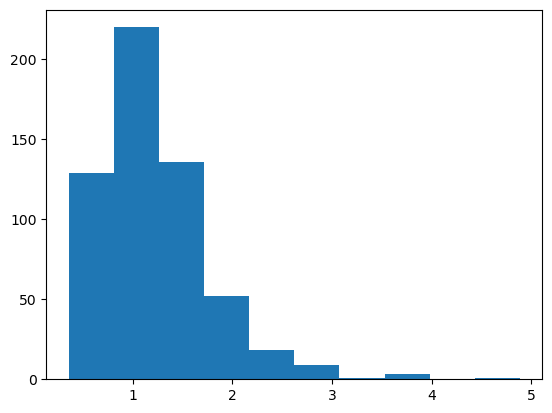

texture_std



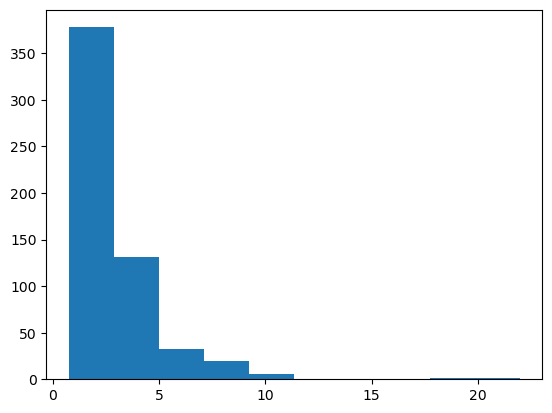

perimeter_std



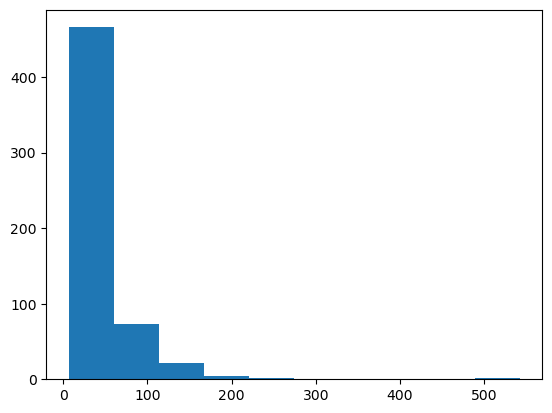

area,_std



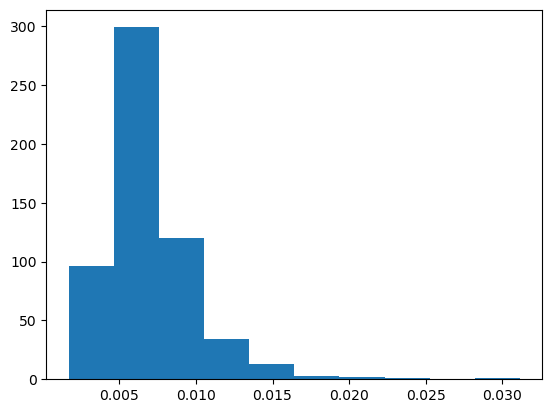

smoothness_std



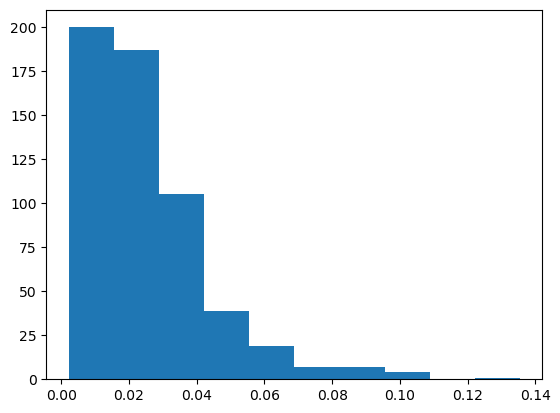

compactness_std



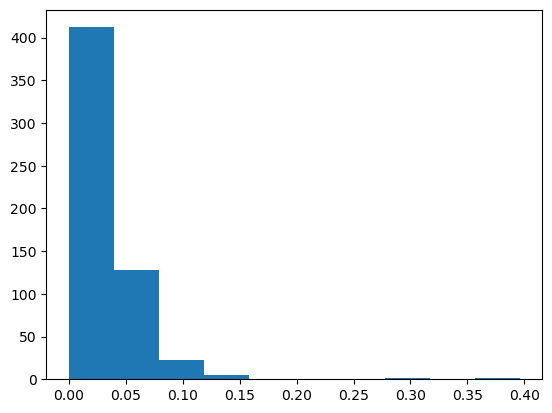

concavity_std



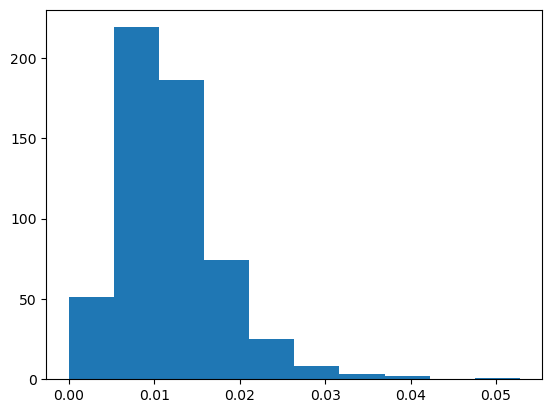

concave_points_std



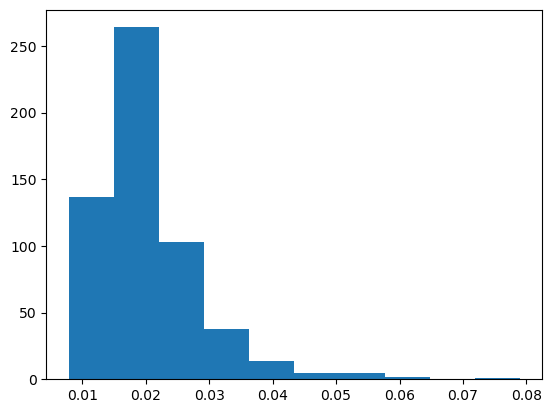

symmetry_std



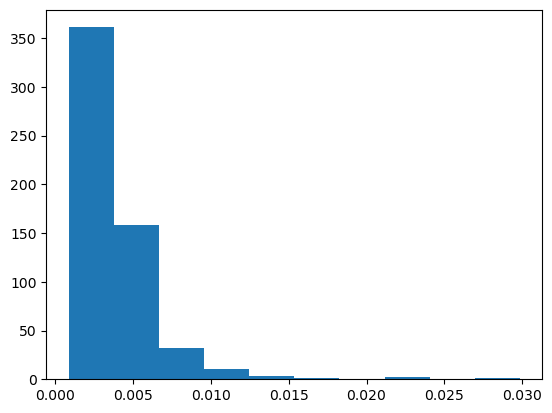

fractal_dimension_std



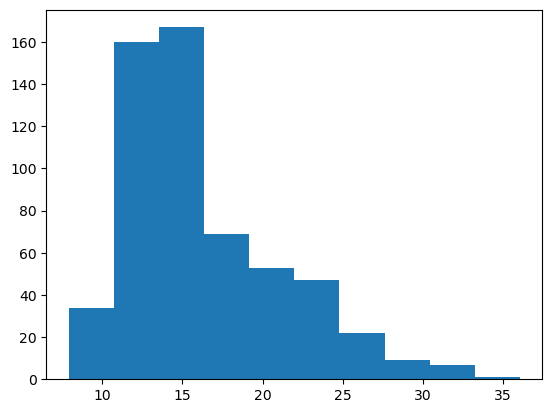

radius_mean_worst



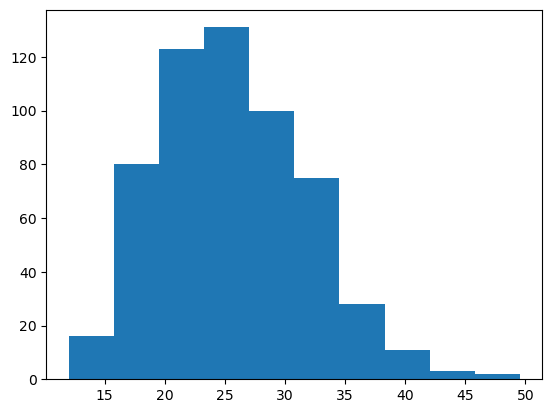

texture_mean_worst



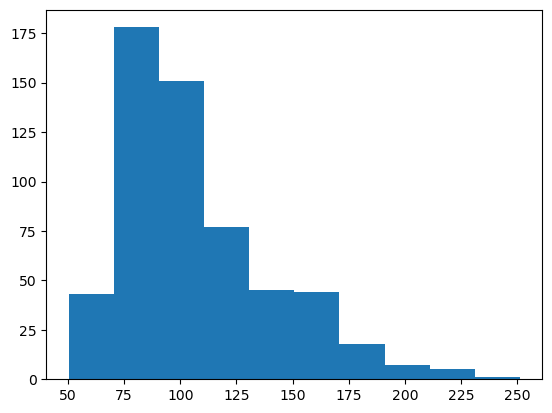

perimeter_mean_worst



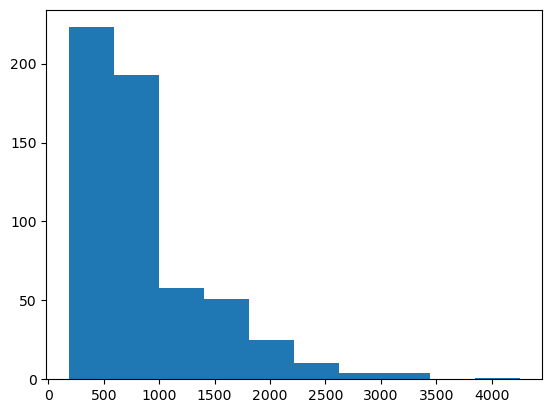

area,_mean_worst



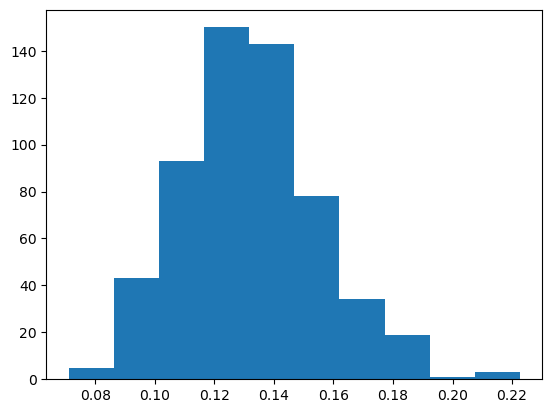

smoothness_mean_worst



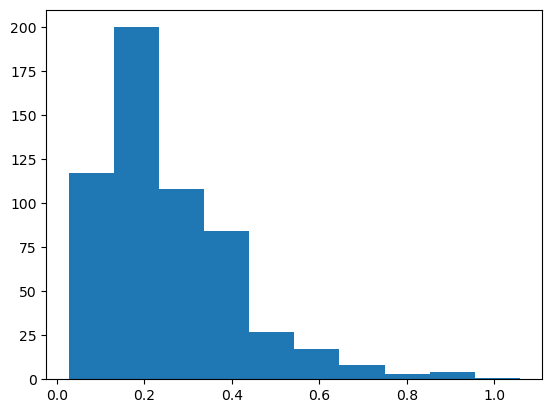

compactness_mean_worst



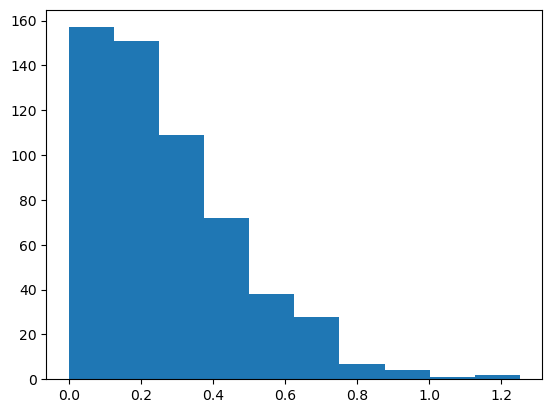

concavity_mean_worst



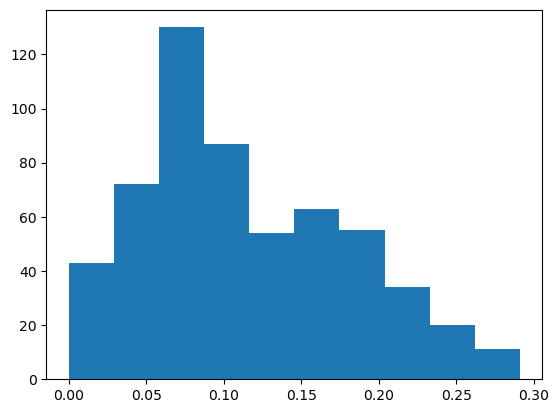

concave_points_mean_worst



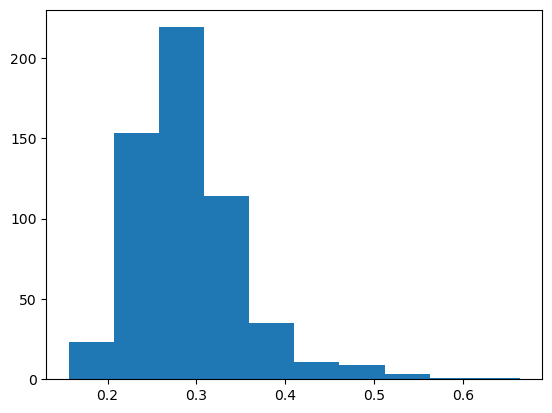

symmetry_mean_worst



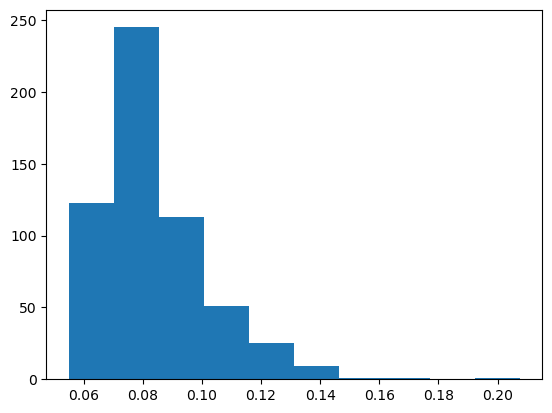

fractal_dimension_mean_worst



In [356]:
for n in df.columns: # we see that our features a scaled differently, so let's normalize all of them except for the class var
    data = df[n]
    plt.hist(data)
    plt.show()
    print(n)
    print()

In [357]:
class my_own_scaler(BaseEstimator,TransformerMixin):
    def __init__(self,inds):
        self.norm = StandardScaler() # create scaled
        self.inds = inds # we pass the indicies of the column we would like to normalize
    
    def fit(self,X,y=None):
        self.one = [] # now, in fit methods, we will create a matrix of corresponding column, which will be normalized later
        
        #print(X)
        for row in X:
            #print(row)
            change = []
            for i in self.inds:
                change.append(row[i])
            self.one.append(change)
                
        self.norm.fit(self.one) # we train our scaler ONLY on these columns, not the whole dataframe
        return self
    
    def transform(self,X,y=None):
        new =  self.norm.transform(self.one) # now, in transform we perform transform :)
        opora = self.inds[0] 
        
        # one crucial detail: we have indices of columns we would like ot change, like self.inds = [6,7,8,9]
        # but, each row in our normalized matrix (new) has indicies 0,1,2,3. We have to map these indicies to the original indicies in the dataframe
        # for this, each time we access the index, like 6, we will subtract the value of the first index (original).
        # in our example, the first value is 6. So 6-6 = 0. Then 7: 7-6 = 1 Then 8: 8-6 = 2 and so on.
        
        c = 0 # index of the row
        for row in X: # now, for each row
            for i in self.inds: # # we will change the position (column) with index i
                new_ind = i-opora # map the index
                row[i] = new[c][new_ind]
            c += 1

        return X # finally, return chnaged dataframe
    
    
# in the end of the notebook you can find a visible example of such performace!

In [358]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,"area,_mean",smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_mean_worst,texture_mean_worst,perimeter_mean_worst,"area,_mean_worst",smoothness_mean_worst,compactness_mean_worst,concavity_mean_worst,concave_points_mean_worst,symmetry_mean_worst,fractal_dimension_mean_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [359]:
sc = my_own_scaler(list(range(1, df.shape[1]))) # all except the first col to be normalized

data_pipe = Pipeline(steps = [["scalar", sc]]) # our pipeline


rows = [list(row) for ind,row in df.iterrows()]

In [360]:
res = data_pipe.fit_transform(rows)

In [361]:
df = pd.DataFrame(data=res, columns = df.columns)

In [362]:
df.head() # normalized df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,"area,_mean",smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_mean_worst,texture_mean_worst,perimeter_mean_worst,"area,_mean_worst",smoothness_mean_worst,compactness_mean_worst,concavity_mean_worst,concave_points_mean_worst,symmetry_mean_worst,fractal_dimension_mean_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


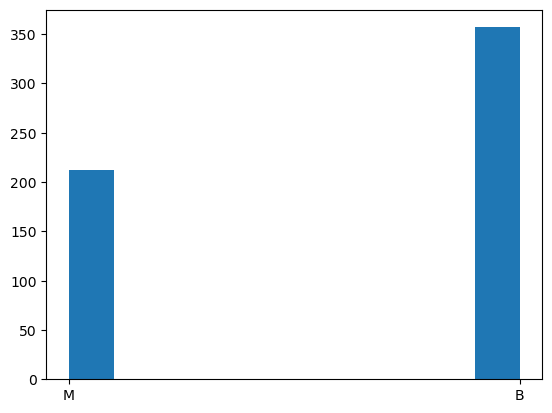

Diagnosis



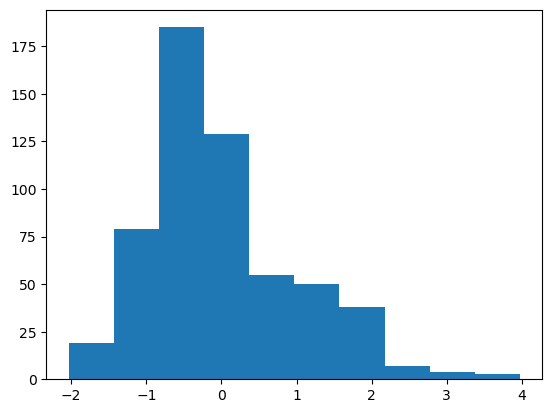

radius_mean



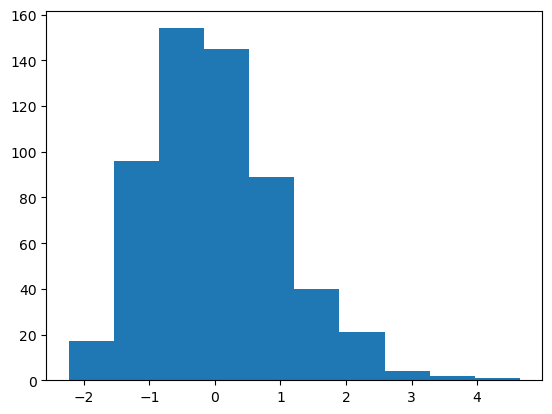

texture_mean



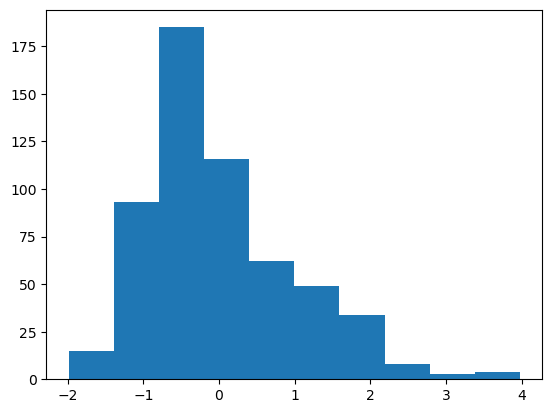

perimeter_mean



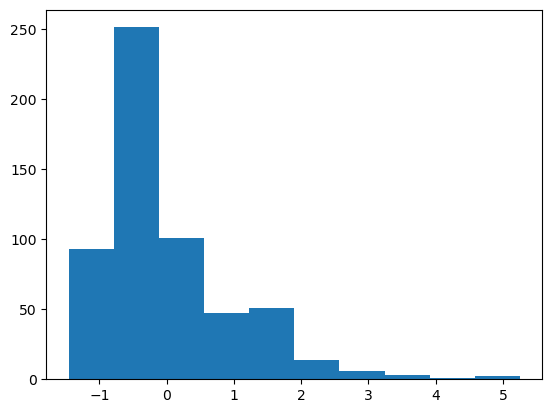

area,_mean



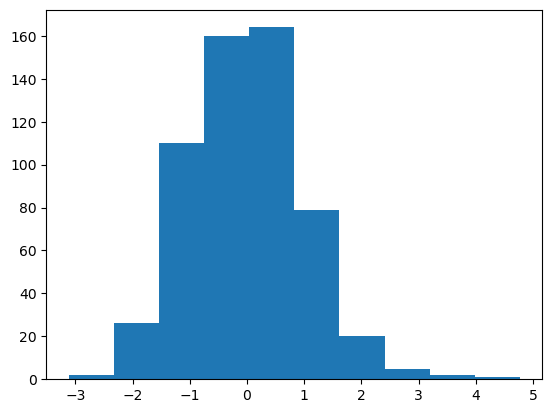

smoothness_mean



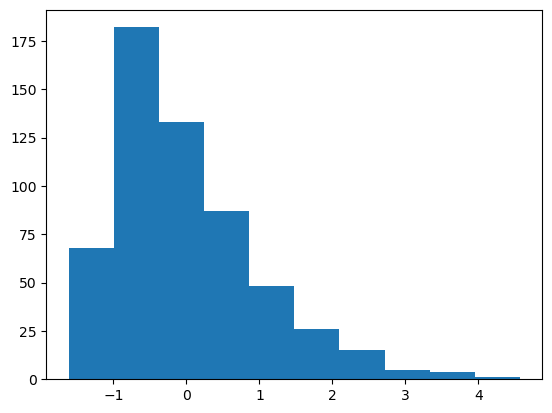

compactness_mean



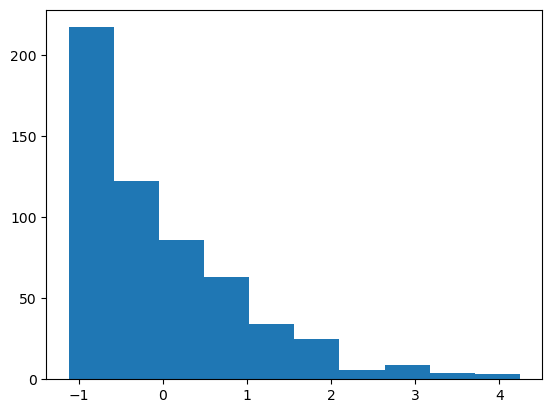

concavity_mean



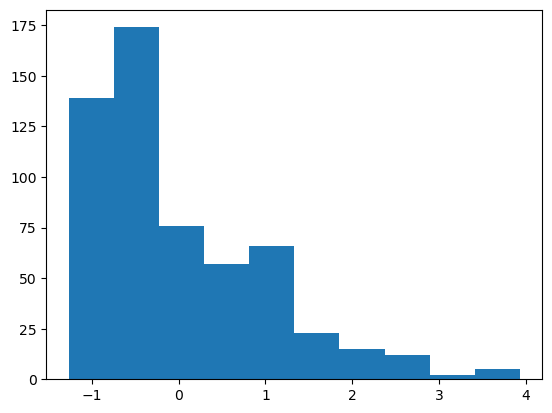

concave_points_mean



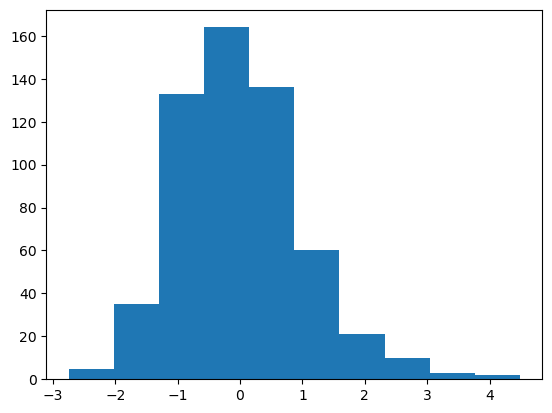

symmetry_mean



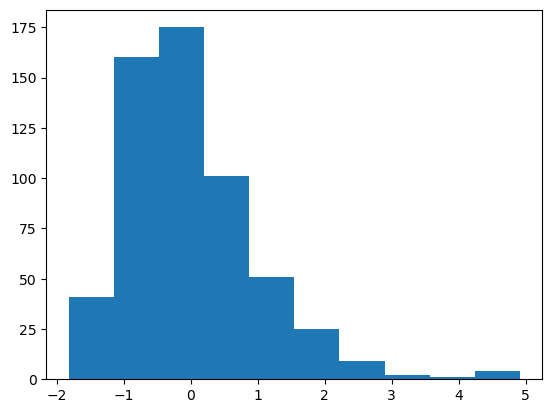

fractal_dimension_mean



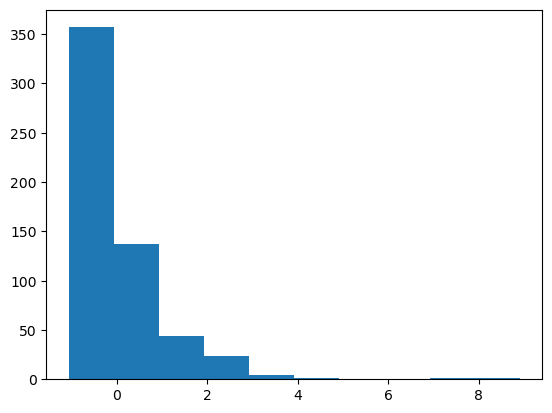

radius_std



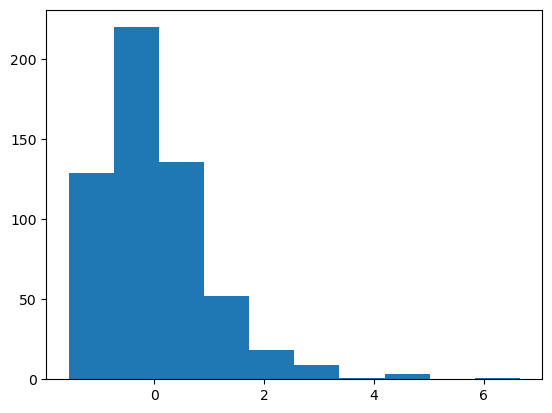

texture_std



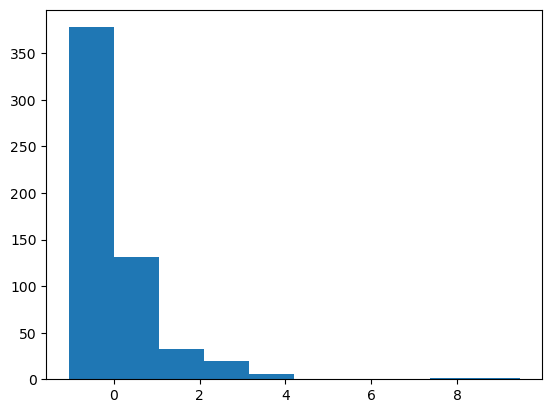

perimeter_std



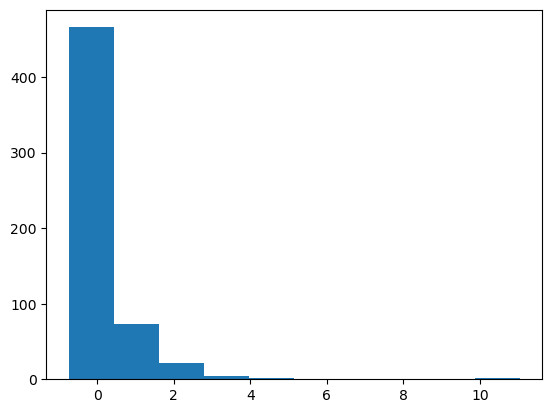

area,_std



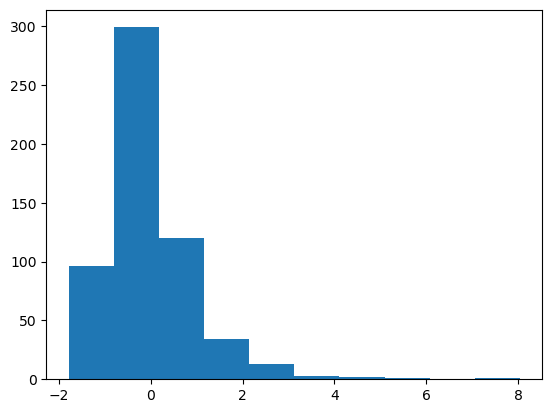

smoothness_std



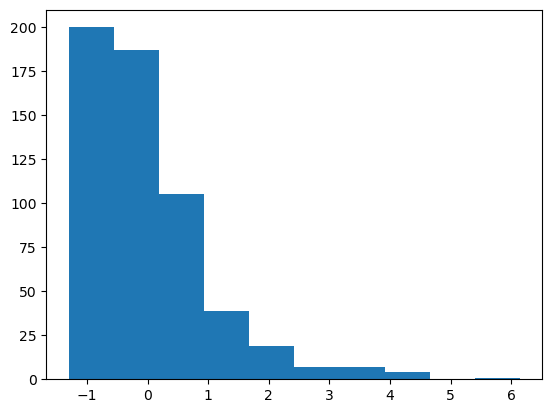

compactness_std



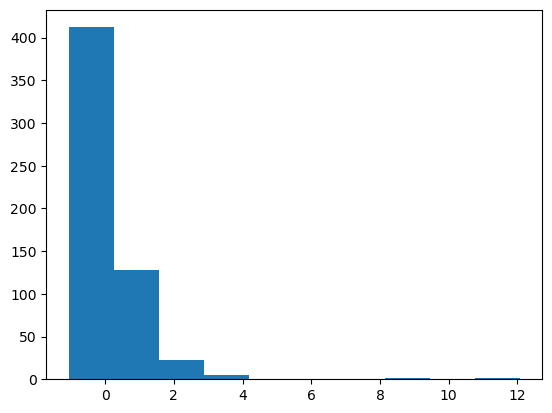

concavity_std



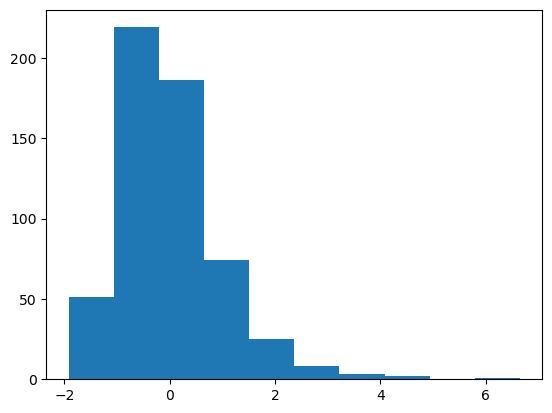

concave_points_std



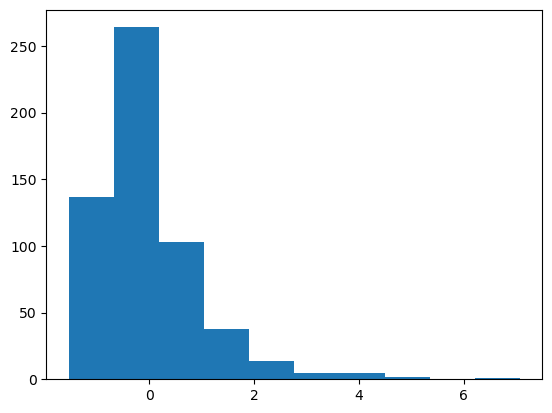

symmetry_std



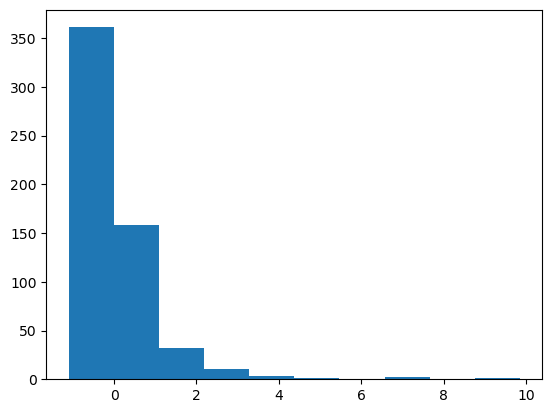

fractal_dimension_std



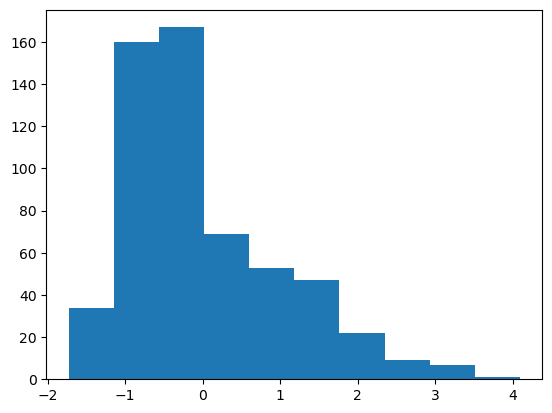

radius_mean_worst



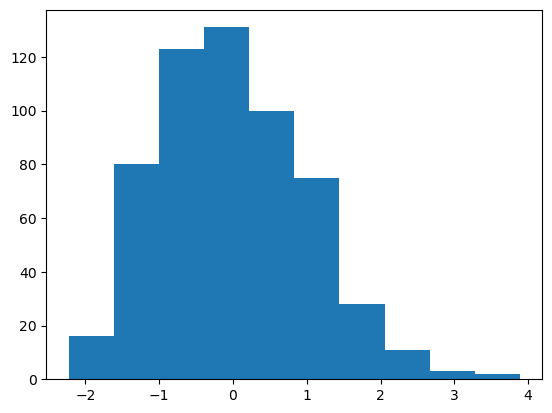

texture_mean_worst



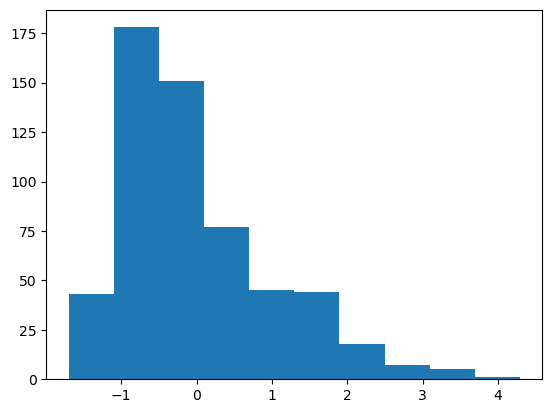

perimeter_mean_worst



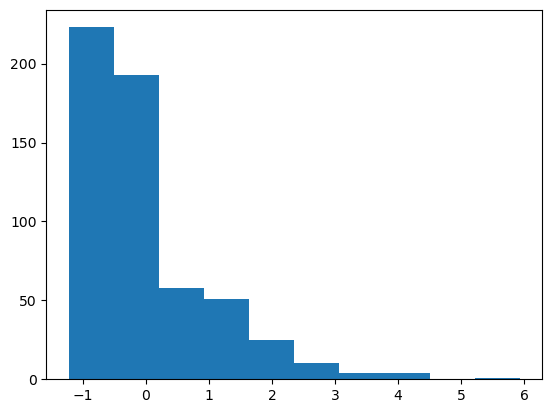

area,_mean_worst



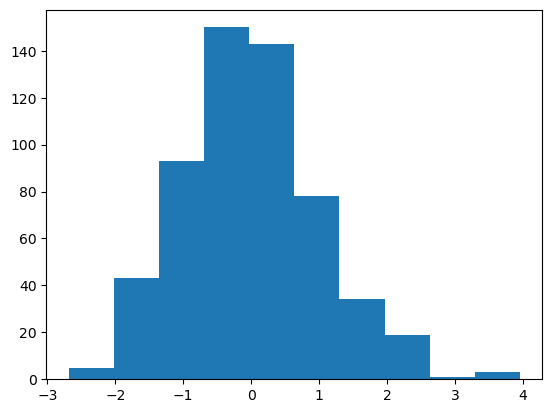

smoothness_mean_worst



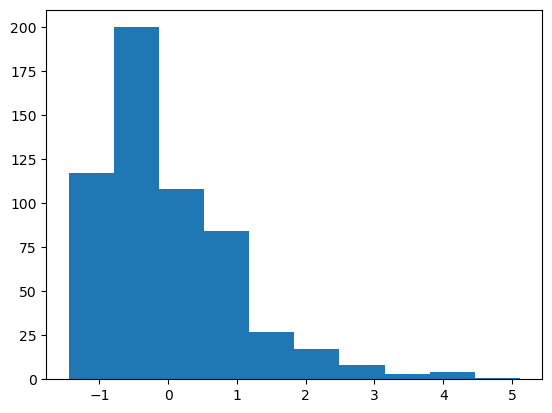

compactness_mean_worst



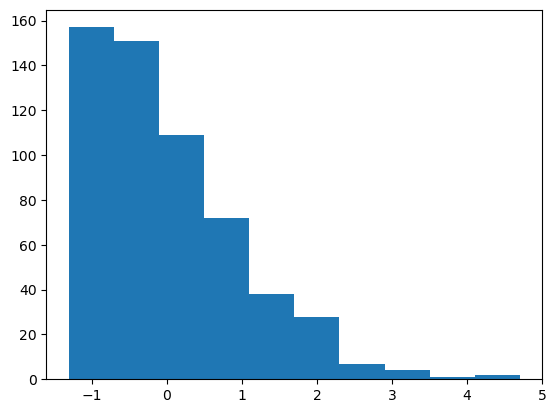

concavity_mean_worst



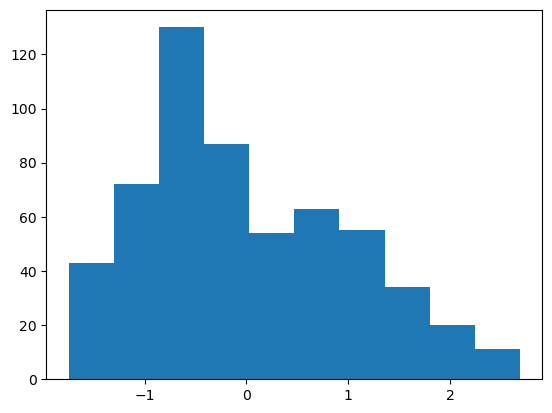

concave_points_mean_worst



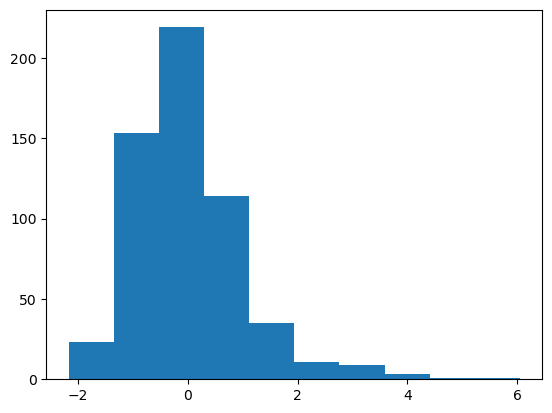

symmetry_mean_worst



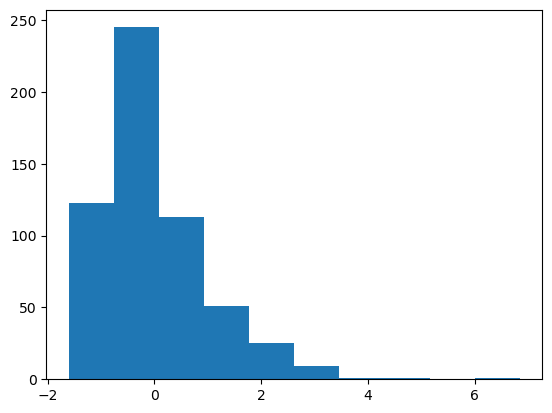

fractal_dimension_mean_worst



In [363]:
for n in df.columns: # now, all features are equally scaled
    data = df[n]
    plt.hist(data)
    plt.show()
    print(n)
    print()

In [364]:
def measure_time(func): # our dec to measure the time for training the model
    def wrapper(*args, **kwargs):
        a = time.time()
        res = func(*args,**kwargs)
        b = time.time()
        print(f"{round((b-a), 5)} long,long seconds were spent on {args[0]}\n") # args[0] is the model
        return res
    
    return wrapper


In [365]:
@measure_time
def run_model(model,x,y): # train the model
    model.fit(x,y)
    return model

In [366]:
def analyze(actual, preds): # report on accuracy, prec, recall and f1 score
    scores = accuracy_score(actual, preds)
    scores1 = precision_score(actual, preds, pos_label="M") # M is +1
    scores2 =  recall_score(actual, preds,pos_label="M")
    scores3 =  f1_score(actual, preds,pos_label="M")
    print(f"accuracy: {scores}\nprecision: {scores1}\nrecall: {scores2}\nf1 score: {scores3}\n")
    print("-"*50)
    return 

In [367]:
x = df.iloc[:, 1:df.shape[1]] # independent and dependent vars
y = df.iloc[:,0]

In [368]:
models = [SGDClassifier(), svm.SVC(kernel = "rbf"), LogisticRegression()]

In [369]:
for model in models: # run before pca
    m = run_model(model,x,y)
    y_hat = m.predict(x)
    analyze(y,y_hat)

0.00199 long,long seconds were spent on SGDClassifier()

accuracy: 0.9789103690685413
precision: 0.9716981132075472
recall: 0.9716981132075472
f1 score: 0.9716981132075472

--------------------------------------------------
0.00399 long,long seconds were spent on SVC()

accuracy: 0.9876977152899824
precision: 1.0
recall: 0.9669811320754716
f1 score: 0.9832134292565947

--------------------------------------------------
0.00598 long,long seconds were spent on LogisticRegression()

accuracy: 0.9876977152899824
precision: 0.9904306220095693
recall: 0.9764150943396226
f1 score: 0.9833729216152018

--------------------------------------------------


In [370]:
# all models did quite well, accuracy is above 95% for each of them
# for svc
# precision is 100%, hence f1 score will be higher for svc rather than for SGD classifier. 

# for logistics reg the measurments were almost the same, with a bit worse precision but a bit better recall

# for our job, we care more about the recall. Why? Because firstly, we mentioned that M is +1 and B is -1.
# recall is the measure in %, of how many +1's were classified correctly. Since +1 is a critical measure for us
# in the other words, its safer to make a mistake and say +1, when it was actually -1, rather than ignoring the true +1, basically False Negative mistake
# so, recall will be our priority here


# since SGD classifier has worse recall we will not consider it as a possible candidate

In [371]:
pca = PCA(n_components=0.95) # preserve 95% of explained variance
pca.fit(df.iloc[:, 1:df.shape[1]]) 
print(f"current dim is: {len(pca.explained_variance_ratio_)}, explained ratio: {sum(pca.explained_variance_ratio_)}")

current dim is: 10, explained ratio: 0.9515688143366667


In [372]:
red_95 = pca.fit_transform(df.iloc[:, 1:df.shape[1]]) # transform
x_1 = red_95

In [373]:
for model in models: # now, run our models on the transformed data (dim = 10)
    m = run_model(model,x_1,y)
    y_hat = m.predict(x_1)
    analyze(y,y_hat)

0.00199 long,long seconds were spent on SGDClassifier()

accuracy: 0.9736379613356766
precision: 0.9712918660287081
recall: 0.9575471698113207
f1 score: 0.9643705463182898

--------------------------------------------------
0.00299 long,long seconds were spent on SVC()

accuracy: 0.984182776801406
precision: 0.9951219512195122
recall: 0.9622641509433962
f1 score: 0.9784172661870504

--------------------------------------------------
0.00299 long,long seconds were spent on LogisticRegression()

accuracy: 0.9859402460456942
precision: 0.9903846153846154
recall: 0.9716981132075472
f1 score: 0.9809523809523809

--------------------------------------------------


In [374]:
# we can see that again LogisticRegression obtained better recall and SGD still is worse than the others. But again,
# differences are small and models did well. Although, measurments are one tad worse, since will dim = 30 the precision for
# svc was 100% now it became 99%. Nevertheless, we also see that models were trained faster! The slowest one for dim=30 was
# log regression with 0.00697 secs on training. For 10 features we have 0.00399 secs which is less than the prev value
# and this is logical - as long as we decrease the dim - time for training will be shorter and shorter, despite
# our dataset is small and its hard to see the difference in time

In [375]:
pca = PCA(n_components=2) # now with 2 components
pca.fit(df.iloc[:, 1:df.shape[1]])

print(f"current dim is: {len(pca.explained_variance_ratio_)}, explained ratio: {sum(pca.explained_variance_ratio_)}")

current dim is: 2, explained ratio: 0.6324320765155942


In [376]:
red_2 = pca.fit_transform(df.iloc[:, 1:df.shape[1]])
x_2 = red_2

In [377]:
for model in models: # run on the dim=2
    m = run_model(model,x_2,y)
    y_hat = m.predict(x_2)
    analyze(y,y_hat)

0.001 long,long seconds were spent on SGDClassifier()

accuracy: 0.945518453427065
precision: 0.9414634146341463
recall: 0.910377358490566
f1 score: 0.9256594724220623

--------------------------------------------------
0.00199 long,long seconds were spent on SVC()

accuracy: 0.9437609841827768
precision: 0.9455445544554455
recall: 0.9009433962264151
f1 score: 0.9227053140096618

--------------------------------------------------
0.00299 long,long seconds were spent on LogisticRegression()

accuracy: 0.9560632688927944
precision: 0.9516908212560387
recall: 0.9292452830188679
f1 score: 0.9403341288782816

--------------------------------------------------


In [378]:
# scores are generally worse, we see that the accuracy became worse and recall, our priority over prec, became worse as well 
# but the time is even less than it was for dim = 10

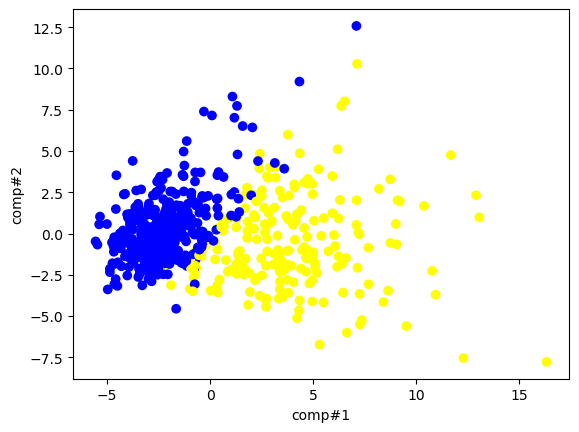

In [379]:
x_s = [i[0] for i in x_2] # vis 2 dims
y_s = [i[1] for i in x_2]

colors = {'B':'blue', 'M':'yellow'}


plt.scatter(x_s, y_s, c=df['Diagnosis'].map(colors))
plt.xlabel("comp#1")
plt.ylabel("comp#2")
plt.show()

In [380]:
m1 = LogisticRegression() # our championion model is log reg
m2 = LogisticRegression()
m3 = LogisticRegression()

m1.fit(df.iloc[:, 1:df.shape[1]], y) # whole dataset
y_hats1 = m1.predict(df.iloc[:, 1:df.shape[1]])
m2.fit(x_1,y) # 10 features
y_hats2 = m2.predict(x_1)
m3.fit(x_2, y) # 2 features
y_hats3 = m3.predict(x_2)

In [381]:
df["pca=30, LogisticRegression"] = y_hats1
df["pca=10, LogisticRegression"] = y_hats2
df["pca=2, LogisticRegression"] = y_hats3

In [382]:
df.head(n=50)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,"area,_mean",smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,"area,_mean_worst",smoothness_mean_worst,compactness_mean_worst,concavity_mean_worst,concave_points_mean_worst,symmetry_mean_worst,fractal_dimension_mean_worst,"pca=30, LogisticRegression","pca=10, LogisticRegression","pca=2, LogisticRegression"
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M,M,M
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M,M,M
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M,M,M
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M,M,M
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M,M,M
5,M,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,...,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,M,M,B
6,M,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,...,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,M,M,M
7,M,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,...,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,M,M,M
8,M,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,...,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,M,M,M
9,M,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,...,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,M,M,M


In [383]:
# thank you